# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import torch
from torch import nn 
from prophet import Prophet
import torch.optim as optim
from pylab import rcParams

# Carga de datos

In [270]:
df = pd.read_csv('./aguacates_EEUU.csv', index_col = 'Unnamed: 0')

# Explorar el conjunto de datos  

In [271]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [272]:
profile = ProfileReport(df, title = 'Aguacates EEUU Profile Report', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Asegurar que estén los datos en orden cronológico

In [273]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df.sort_values(by="Date")

Date  AveragePrice  Total Volume        4046       4225       4770  \
51 2015-01-04          1.75      27365.89     9307.34    3844.81     615.28   
51 2015-01-04          1.49      17723.17     1189.35   15628.27       0.00   
51 2015-01-04          1.68       2896.72      161.68     206.96       0.00   
51 2015-01-04          1.52      54956.80     3013.04   35456.88    1561.70   
51 2015-01-04          1.64       1505.12        1.27    1129.50       0.00   
..        ...           ...           ...         ...        ...        ...   
0  2018-03-25          1.36     908202.13   142681.06  463136.28  174975.75   
0  2018-03-25          0.70    9010588.32  3999735.71  966589.50   30130.82   
0  2018-03-25          1.42     163496.70    29253.30    5080.04       0.00   
0  2018-03-25          1.70     190257.38    29644.09   70982.10       0.00   
0  2018-03-25          1.34    1774776.77    63905.98  908653.71     843.45   

    Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
51    13598.46    13061.10      537.36         0.00       organic  2015   
51      905.55      905.55        0.00         0.00       organic  2015   
51     2528.08     2528.08        0.00         0.00       organic  2015   
51    14925.18    11264.80     3660.38         0.00  conventional  2015   
51      374.35      186.67      187.68         0.00       organic  2015   
..         ...         ...         ...          ...           ...   ...   
0    127409.04   103579.41    22467.04      1362.59  conventional  2018   
0   4014132.29  3398569.92   546409.74     69152.63  conventional  2018   
0    129163.36   109052.26    20111.10         0.00       organic  2018   
0     89631.19    89424.11      207.08         0.00       organic  2018   
0    801373.63   774634.09    23833.93      2905.61  conventional  2018   

                region  
51           Southeast  
51             Chicago  
51  HarrisburgScranton  
51          Pittsburgh  
51               Boise  
..                 ...  
0              Chicago  
0         SouthCentral  
0         SouthCentral  
0           California  
0              NewYork  

[18249 rows x 13 columns]

### Preprocesamiento de los datos

In [274]:
dataNrm = df.copy()
dataNrm['AveragePrice'] = (df['AveragePrice'] - df['AveragePrice'].mean()) / df['AveragePrice'].std()
dataNrm['Total Volume'] = (df['Total Volume'] - df['Total Volume'].mean()) / df['Total Volume'].std()
dataNrm['4046'] = (df['4046'] - df['4046'].mean()) / df['4046'].std()
dataNrm['4225'] = (df['4225'] - df['4225'].mean()) / df['4225'].std()
dataNrm['4770'] = (df['4770'] - df['4770'].mean()) / df['4770'].std()
dataNrm['Total Bags'] = (df['Total Bags'] - df['Total Bags'].mean()) / df['Total Bags'].std()
dataNrm['Small Bags'] = (df['Small Bags'] - df['Small Bags'].mean()) / df['Small Bags'].std()
dataNrm['Large Bags'] = (df['Large Bags'] - df['Large Bags'].mean()) / df['Large Bags'].std()
dataNrm['XLarge Bags'] = (df['XLarge Bags'] - df['XLarge Bags'].mean()) / df['XLarge Bags'].std()

In [275]:
# Standardize all variable names
df.columns = df.columns.str.lower().str.replace(' ', '')
df.columns

Index(['date', 'averageprice', 'totalvolume', '4046', '4225', '4770',
       'totalbags', 'smallbags', 'largebags', 'xlargebags', 'type', 'year',
       'region'],
      dtype='object')

# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

In [276]:
df.plot(x='date', y='averageprice', figsize=(25, 5))
plt.title('Average Price variation over time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# Realizar una gráfica de barras para ver el número de regiones

In [277]:
df['region'].value_counts().plot(kind='bar', figsize=(25, 5))
plt.title('Frequency of regions')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

# Realizar una gráfica de barras para ver de qué años se tiene información

In [278]:
df['year'].value_counts().plot(kind='bar', figsize=(25, 5))
plt.title('Frequency of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

### Precio promedio cada mes

In [279]:
monthlyDF = df.groupby(df['date'].dt.strftime('%m'))['averageprice'].mean().sort_values().reset_index(name='averageprice')
#monthlyDF
monthlyDF = monthlyDF.sort_values('date')
monthlyDF.rename(columns={'date':'month'}, inplace=True)
monthlyDF['averageprice'] = monthlyDF['averageprice'].apply(lambda x: float(x))
monthlyDF['month'] = monthlyDF['month'].apply(lambda x: int(x))
sns.regplot(x='month', y='averageprice', data=monthlyDF, order=2, ci=None, scatter_kws={'color':'r', 's':9})
plt.title('Average Price variation over months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [280]:
priceMax = df['averageprice'].mean()
priceMin = df['averageprice'].std()

priceTMax = df['averageprice'].mean()
priceTMin = df['totalvolume'].std()

yearMean = df['averageprice'].mean()
yearStd = df['totalvolume'].std()

df['averageprice'] = (df['averageprice']-priceMax)/priceMin
df['totalvolume'] = (df['totalvolume']-priceTMax)/priceTMin
df['year'] = (df['year']-yearMean)/yearStd

# Realizar predicciones

In [281]:
inputs = ['year','totalvolume']
x = torch.tensor(df[inputs].values,dtype=torch.float)

In [282]:
outputs = ['averageprice']
y = torch.tensor(df[outputs].values,dtype=torch.float)

# Creación y ajuste del modelo

In [283]:
model = nn.Sequential(
            nn.Linear(2,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )

In [284]:
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


for epoch in range(3):
    totalLoss = 0
    for i in range(len(x)):
        ypred = model(x[i])
        loss = criterion(ypred, y[i])

        totalLoss+=loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ("Total Loss: ", totalLoss)

Total Loss:  10191.84568205284
Total Loss:  10005.74377647456
Total Loss:  10005.74377647456


# Pronosticar hacia el futuro un año (365 días)

In [285]:
model.eval()

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [286]:
predictions=[]
actual=[]

for i in range(len(x)):
    prediction = model(x[i])                               
    prediction = prediction*priceMax+priceMin
    act = y[i]*priceMax+priceMin
    predictions.append(prediction.tolist())
    actual.append(act.item())

In [287]:
plt.scatter(actual, predictions)
plt.xlabel('Actual Avocados Price')
plt.ylabel('Predicted Avocados Price')
plt.plot([0,2], [0,2])
plt.xlim(0, 2)
plt.ylim(0, 2)

plt.show()

In [288]:
x1 = torch.tensor([2019, 55979],dtype=float)
y1 = model(x1.float())
y1 = y1*priceMax+priceMin

print ("Neural Network Predicts: ", y1.item())

Neural Network Predicts:  1.178187608718872


# Graficar los datos históricos y los del futuro

In [289]:
df_selected = df[['date', 'averageprice']]

# comprobando que la columna tiempo este en formato datetime
df_selected['date'] = pd.to_datetime(df_selected['date'])

# comprobando que las columnas se llamen 'ds' y 'y' respectivamente
df_selected = df_selected.rename(columns={'date': 'ds', 'averageprice': 'y'})
print(df_selected.head())

          ds         y
0 2015-12-27 -0.188683
1 2015-12-20 -0.139016
2 2015-12-13 -1.182037
3 2015-12-06 -0.809529
4 2015-11-29 -0.312853


C:\Users\julio\AppData\Local\Temp\ipykernel_30364\1542611381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['date'] = pd.to_datetime(df_selected['date'])


In [290]:
# 95% de intervalo de incertidumbre
m = Prophet(interval_width=0.95)
#df_selected = df_selected.loc[df_selected['ds'] < '2019-01-01']
m.fit(df_selected)

20:09:42 - cmdstanpy - INFO - Chain [1] start processing
20:09:46 - cmdstanpy - INFO - Chain [1] done processing


In [291]:
prediction_dates = m.make_future_dataframe(periods=365)
prediction = m.predict(prediction_dates)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
529 2019-03-21 -0.739448   -2.647442    1.220178
530 2019-03-22 -0.736780   -2.544499    1.153910
531 2019-03-23 -0.733407   -2.560430    1.145982
532 2019-03-24 -0.729379   -2.575992    1.193349
533 2019-03-25 -0.724768   -2.682897    1.095581

# Graficar los componentes del pronóstico

### Grafica componentes del historico

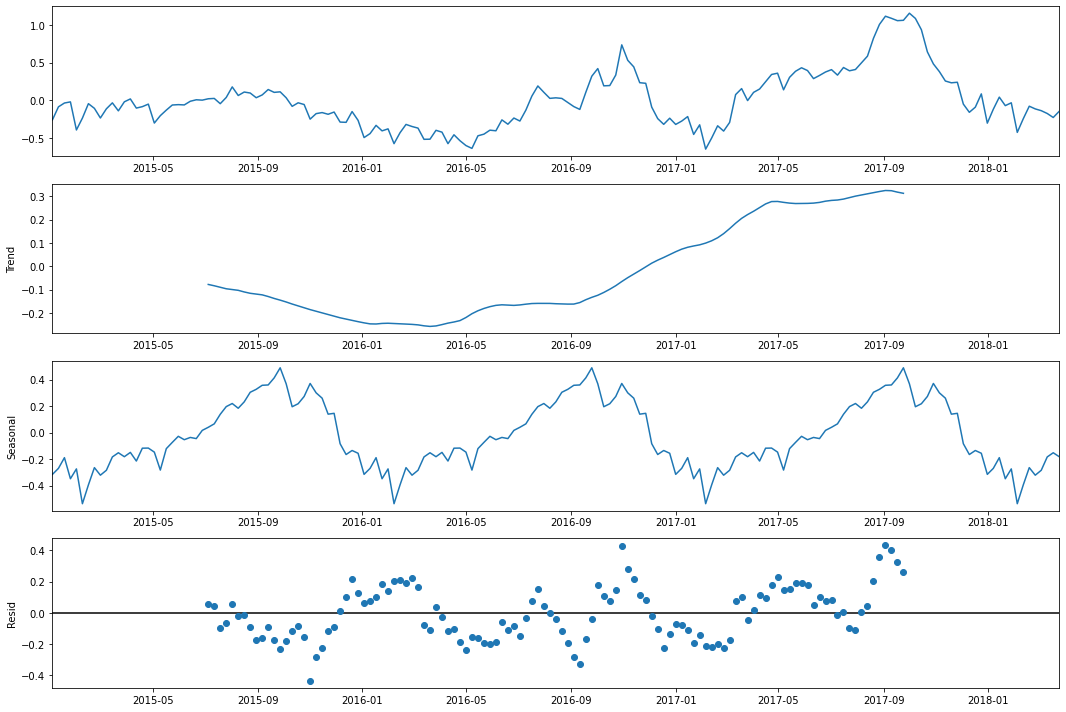

In [292]:
# use dt column as index
df_selected = df[['date', 'averageprice']].set_index('date')
df_selected = df_selected.groupby(['date']).mean().reset_index()
df_selected.set_index('date', inplace=True)
df_selected.index = pd.to_datetime(df_selected.index)

decomposition = sm.tsa.seasonal_decompose(df_selected, model='additive')

fig = decomposition.plot()
plt.show()

### Grafica componentes del pronostico

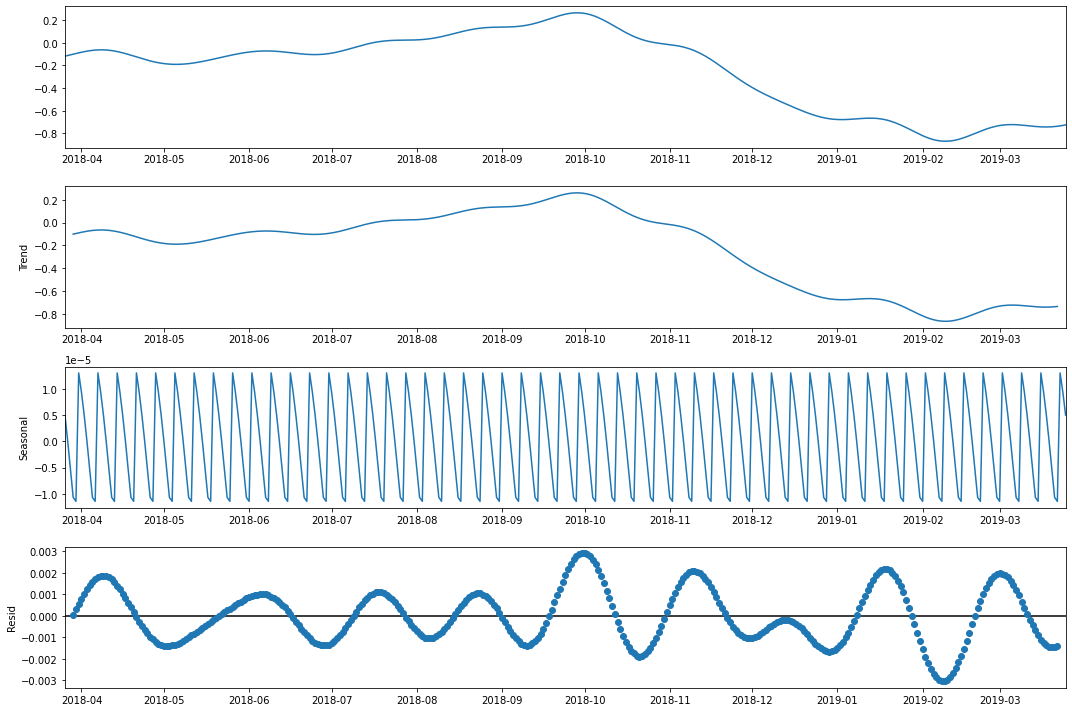

In [293]:
df_selected = prediction[['ds', 'yhat']].set_index('ds')
# select the last 365 days
df_selected = df_selected.loc[df_selected.index > '2018-03-25']
df_selected = df_selected.groupby(['ds']).mean().reset_index()
df_selected.set_index('ds', inplace=True)
df_selected.index = pd.to_datetime(df_selected.index)

decomposition = sm.tsa.seasonal_decompose(df_selected, model='additive')

fig = decomposition.plot()
plt.show()

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

In [294]:
df_west = df.loc[df['region'] == 'West']
df_west

date  averageprice  totalvolume        4046        4225       4770  \
0  2015-12-27     -1.430375     1.532332  2038443.68  1717599.45  125254.82   
1  2015-12-20     -1.306206     1.371821  2017331.24  1314711.00  130849.60   
2  2015-12-13     -1.380707     1.418669  1798995.46  1596329.01  134101.62   
3  2015-12-06     -1.629045     1.795984  2097720.52  2051392.83  107568.34   
4  2015-11-29     -1.033034     1.077039  1461861.54  1216811.00  104219.76   
..        ...           ...          ...         ...         ...        ...   
7  2018-02-04      0.009987     0.082054    22474.66    55360.49     133.41   
8  2018-01-28      0.978506     0.053850    22918.40    33051.14      93.52   
9  2018-01-21      1.053008     0.054818    27049.44    33561.32     439.47   
10 2018-01-14      1.028174     0.060227    33869.12    47435.14     433.52   
11 2018-01-07      0.183824     0.086053    34734.97    62967.74     157.77   

     totalbags   smallbags  largebags  xlargebags          type      year  \
0   1410681.68   838267.79  567269.76     5144.13  conventional  0.000583   
1   1274757.19   843691.13  417746.45    13319.61  conventional  0.000583   
2   1370013.83   851506.76  517936.19      570.88  conventional  0.000583   
3   1945832.15  1360760.83  582846.33     2224.99  conventional  0.000583   
4    936710.91   688674.00  247318.15      718.76  conventional  0.000583   
..         ...         ...        ...         ...           ...       ...   
7    205409.91    70232.59  134666.91      510.41       organic  0.000584   
8    129911.47    77822.23   51986.86      102.38       organic  0.000584   
9    128267.76    76091.99   51947.50      228.27       organic  0.000584   
10   126261.89    89115.78   37133.99       12.12       organic  0.000584   
11   199330.12   103761.55   95544.39       24.18       organic  0.000584   

   region  
0    West  
1    West  
2    West  
3    West  
4    West  
..    ...  
7    West  
8    West  
9    West  
10   West  
11   West  

[338 rows x 13 columns]

### Por si acaso no están ordenadas las observaciones

In [295]:
# ya estan ordenadas por fecha

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

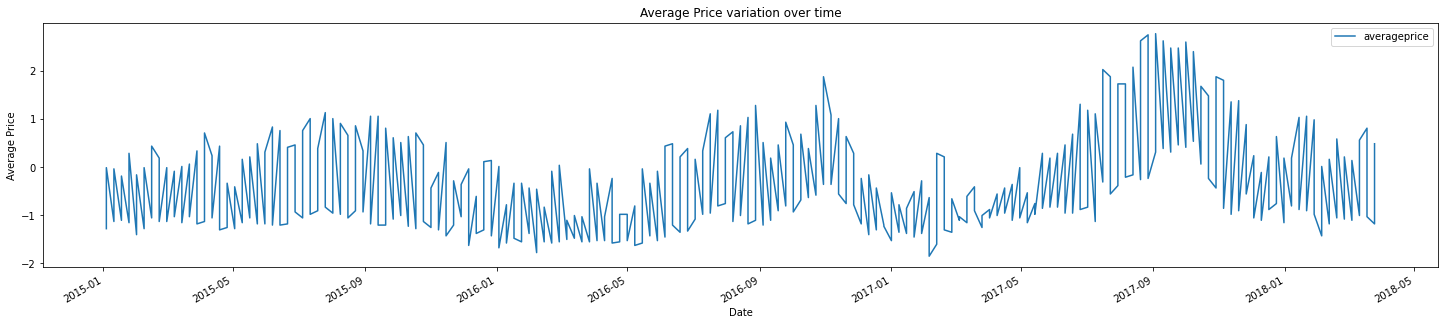

In [296]:
df_west.plot(x='date', y='averageprice', figsize=(25, 5))
plt.title('Average Price variation over time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

In [297]:
df_selected = df_west[['date', 'averageprice']]

# comprobando que la columna tiempo este en formato datetime
df_selected['date'] = pd.to_datetime(df_selected['date'])

# comprobando que las columnas se llamen 'ds' y 'y' respectivamente
df_selected = df_selected.rename(columns={'date': 'ds', 'averageprice': 'y'})
print(df_selected.head())

          ds         y
0 2015-12-27 -1.430375
1 2015-12-20 -1.306206
2 2015-12-13 -1.380707
3 2015-12-06 -1.629045
4 2015-11-29 -1.033034


C:\Users\julio\AppData\Local\Temp\ipykernel_30364\587623012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['date'] = pd.to_datetime(df_selected['date'])


In [298]:
# 95% de intervalo de incertidumbre
m = Prophet(interval_width=0.95)
#df_selected = df_selected.loc[df_selected['ds'] < '2019-01-01']
m.fit(df_selected)

20:09:49 - cmdstanpy - INFO - Chain [1] start processing
20:09:49 - cmdstanpy - INFO - Chain [1] done processing


# Pronosticar al futuro un año (365 días)

In [299]:
prediction_dates = m.make_future_dataframe(periods=365)
prediction = m.predict(prediction_dates)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
529 2019-03-21 -0.078885   -1.702955    1.708926
530 2019-03-22 -0.067654   -1.821187    1.602020
531 2019-03-23 -0.055281   -1.762238    1.677783
532 2019-03-24 -0.042010   -1.736902    1.699800
533 2019-03-25 -0.028108   -1.642358    1.615531

# Graficar datos históricos y pronosticados

### Grafica componentes del historico

In [300]:
# use dt column as index
df_selected = df_west[['date', 'averageprice']].set_index('date')
df_selected = df_selected.groupby(['date']).mean().reset_index()
df_selected.set_index('date', inplace=True)
df_selected.index = pd.to_datetime(df_selected.index)

decomposition = sm.tsa.seasonal_decompose(df_selected, model='additive')

fig = decomposition.plot()
plt.show()

### Grafica componentes del pronostico

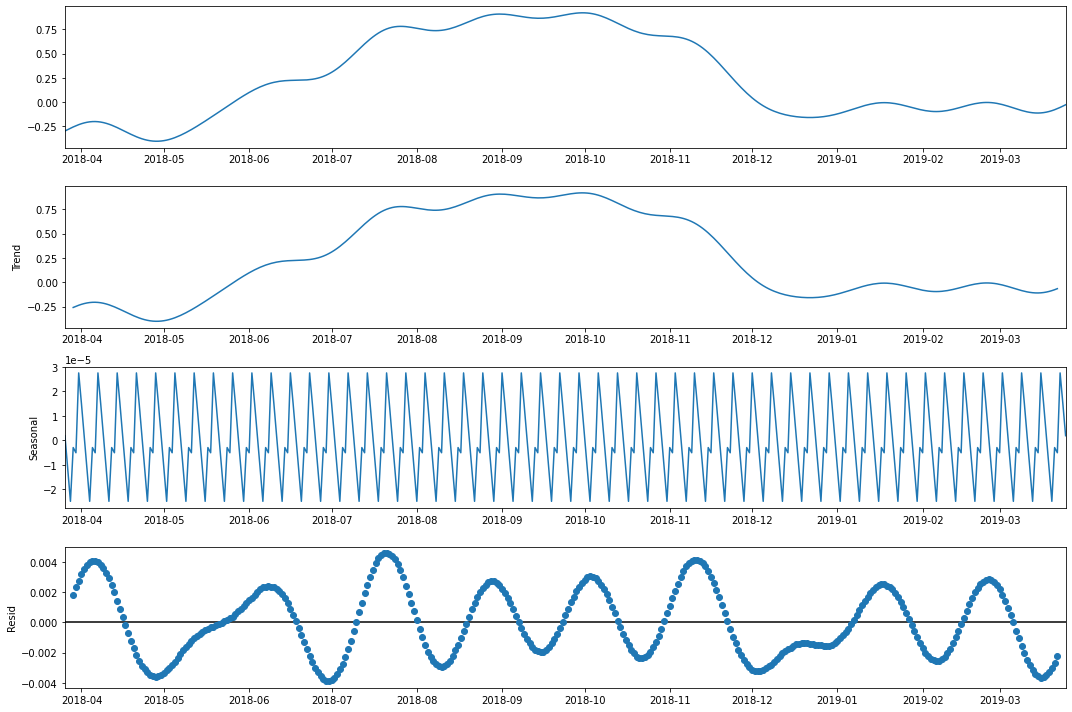

In [301]:
df_selected = prediction[['ds', 'yhat']].set_index('ds')
# select the last 365 days
df_selected = df_selected.loc[df_selected.index > '2018-03-25']
df_selected = df_selected.groupby(['ds']).mean().reset_index()
df_selected.set_index('ds', inplace=True)
df_selected.index = pd.to_datetime(df_selected.index)

decomposition = sm.tsa.seasonal_decompose(df_selected, model='additive')

fig = decomposition.plot()
plt.show()